In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(0)

n = 100

age = np.random.normal(loc=35, scale=10, size = n).astype(int)
annual_income = np.random.normal(loc=70000, scale=15000, size=n).astype(int)
spending_score = np.random.normal(loc=50, scale=20 , size =n).astype(int)

data = {
    'Idade': age,
    'Receita Anual': annual_income,
    'Pontuação de Gastos': spending_score
}
df = pd.DataFrame(data)
df.head()

,Idade,Receita Anual,Pontuação de Gastos
0,52,98247,42
1,39,49783,45
2,44,50942,71
3,57,84540,63
4,53,52403,62


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()

,Idade,Receita Anual,Pontuação de Gastos
0,1.677947,1.740808,-0.333525
1,0.387982,-1.381874,-0.175706
2,0.884122,-1.307197,1.192063
3,2.174087,0.857624,0.771211
4,1.777175,-1.213060,0.718605


In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [6]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0) 
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

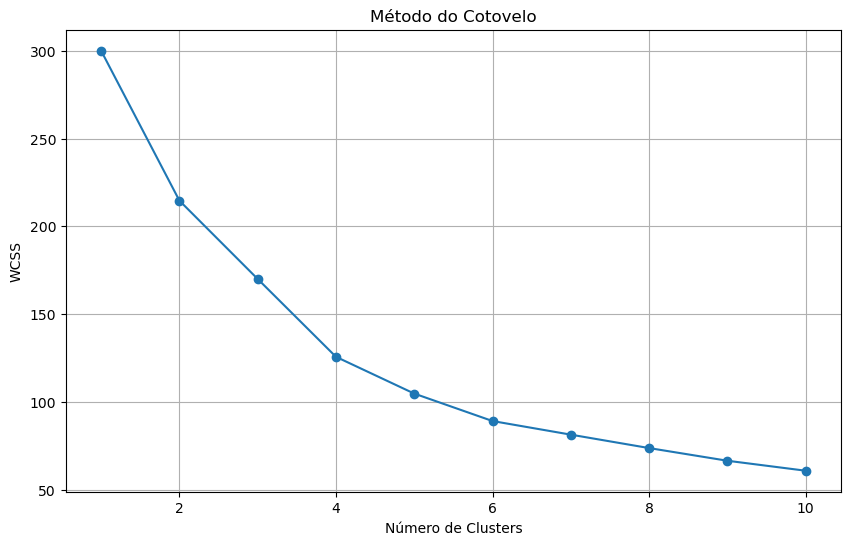

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.grid(True)
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(df_scaled)

df['Cluster'] = cluster_labels
df_scaled['Cluster'] = cluster_labels

cluster_summary = df.groupby('Cluster').agg({
    'Idade': ['mean', 'std'],
    'Receita Anual': ['mean', 'std'],
    'Pontuação de Gastos': ['mean', 'std'],
    'Cluster': 'count'
}).reset_index()

cluster_summary.columns = ['Cluster', 'Idade_Media', 'Idade_DP', 'Receita_Anual_Media', 'Receita_Anual_DP',
'Pontuacao_de_Gastos_Media',
'Pontuacao_de_Gastos_DP', 'Contagem']
cluster_summary

,Cluster,Idade_Media,Idade_DP,Receita_Anual_Media,Receita_Anual_DP,Pontuacao_de_Gastos_Media,Pontuacao_de_Gastos_DP,Contagem
0,0,34.366667,10.087491,62033.200000,10760.291828,66.900000,12.866288,30
1,1,38.736842,8.913046,87045.789474,8758.535198,48.736842,11.509536,38
2,2,31.437500,10.345445,61069.750000,9060.433387,30.468750,13.762934,32
